In [127]:
from selenium import webdriver   #  載入selenium模組裡的webdriver函數
driver = webdriver.Chrome(executable_path="/usr/local/bin/chromedriver")
driver.get('https://comicbus.live/online/a-14132.html?ch=1')   #  自動開啟頁面
# driver.page_source

In [123]:
from bs4 import BeautifulSoup   #  載入bs4模組裡的BeautifulSoup函數
soup =BeautifulSoup(driver.page_source, 'html.parser') #  解析網頁
print('https:' + soup.select_one('#TheImg').get('src'))   #  找出漫畫圖檔位置

In [124]:
import requests  #  載入requests模組
res = requests.get('https://img8.8comic.com/7/14132/1/001_3FM.jpg') # 下載圖片
with open('test.jpg', 'wb') as f:
    f.write(res.content)

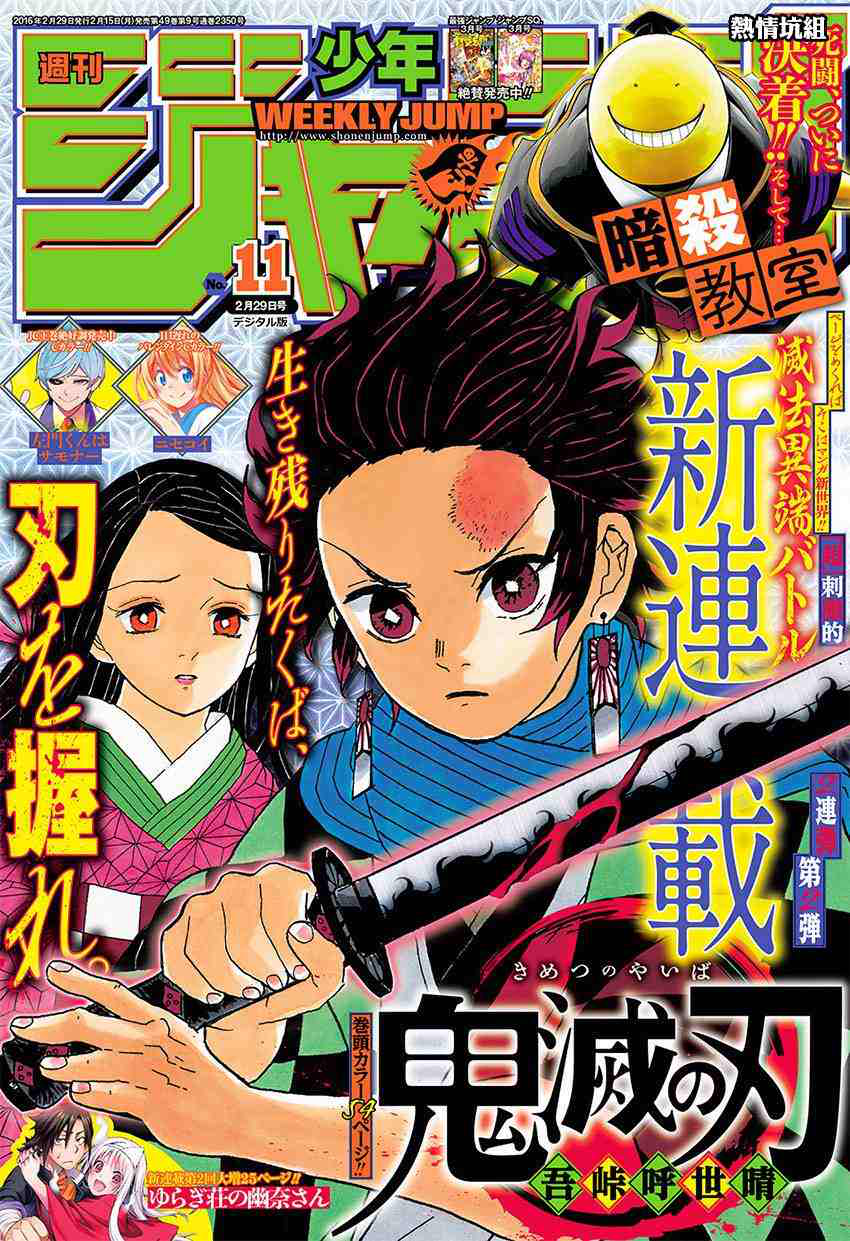

In [125]:
from PIL import Image  #  PIL模組裡的Image函數
Image.open('test.jpg')  #  打開圖片

In [126]:
import time
pageurl = 'https://comicbus.live/online/a-14132.html?ch=1-{}'
pagenum = 54
for i in range(pagenum):
    driver.get(pageurl.format(i+1))
    soup = BeautifulSoup(driver.page_source, 'html')
    imgurl = 'https:' + soup.select_one('#TheImg').get('src')
    res = requests.get(imgurl)
    with open('{}.jpg'.format(i), 'wb') as f:
        f.write(res.content)
    time.sleep(1)
